<a href="https://colab.research.google.com/github/sparsh-01M/Fitpro/blob/master/AD_VS_REVENUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/machine learning

/content/drive/MyDrive/machine learning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [ ]:
names = ['id', 'TV_Budget', 'Radio_Budget', 'NP_Budget', 'Sales']

In [ ]:
df = pd.read_csv("Advertising Budget and Sales.csv",names=names)

In [ ]:
df.head(2)

,id,TV_Budget,Radio_Budget,NP_Budget,Sales
0,NaN,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,1.0,230.1,37.8,69.2,22.1


In [ ]:
df = df.drop(columns=['id'])
df.head(2)

,TV_Budget,Radio_Budget,NP_Budget,Sales
0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1


In [ ]:
df = df.drop(index = df.index[0])
df.head(1)

,TV_Budget,Radio_Budget,NP_Budget,Sales
1,230.1,37.8,69.2,22.1


In [ ]:
df[['TV_Budget','Radio_Budget','NP_Budget','Sales']] = df[['TV_Budget','Radio_Budget','NP_Budget','Sales']].astype(object).astype(float)

In [ ]:
df.shape

(200, 4)

array([[<Axes: title={'center': 'TV_Budget'}>,
        <Axes: title={'center': 'Radio_Budget'}>],
       [<Axes: title={'center': 'NP_Budget'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

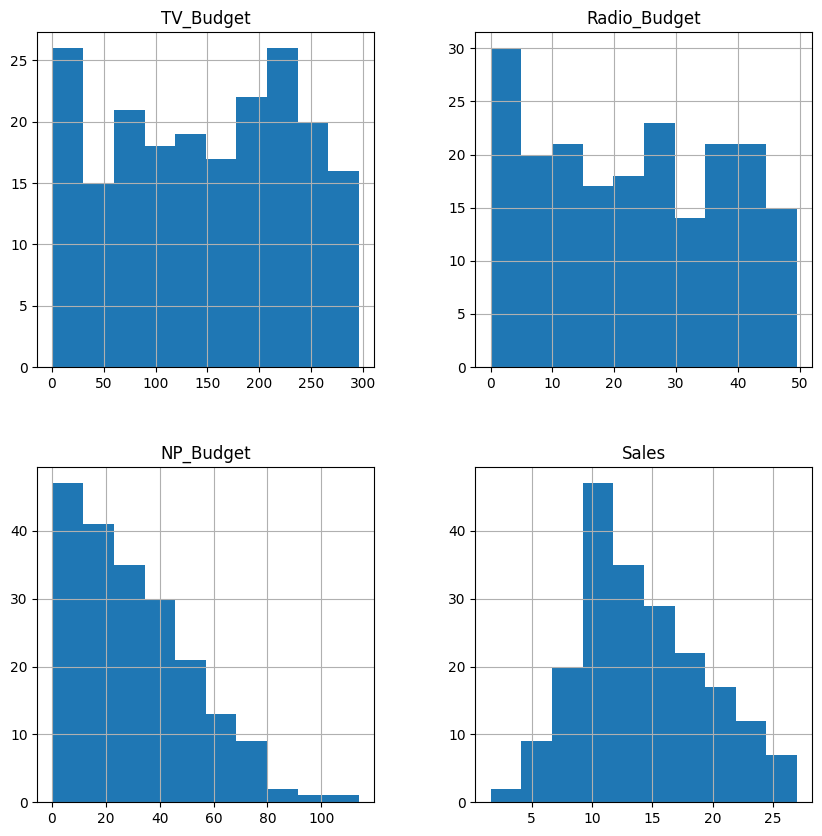

In [ ]:
df.hist(figsize=(10,10))

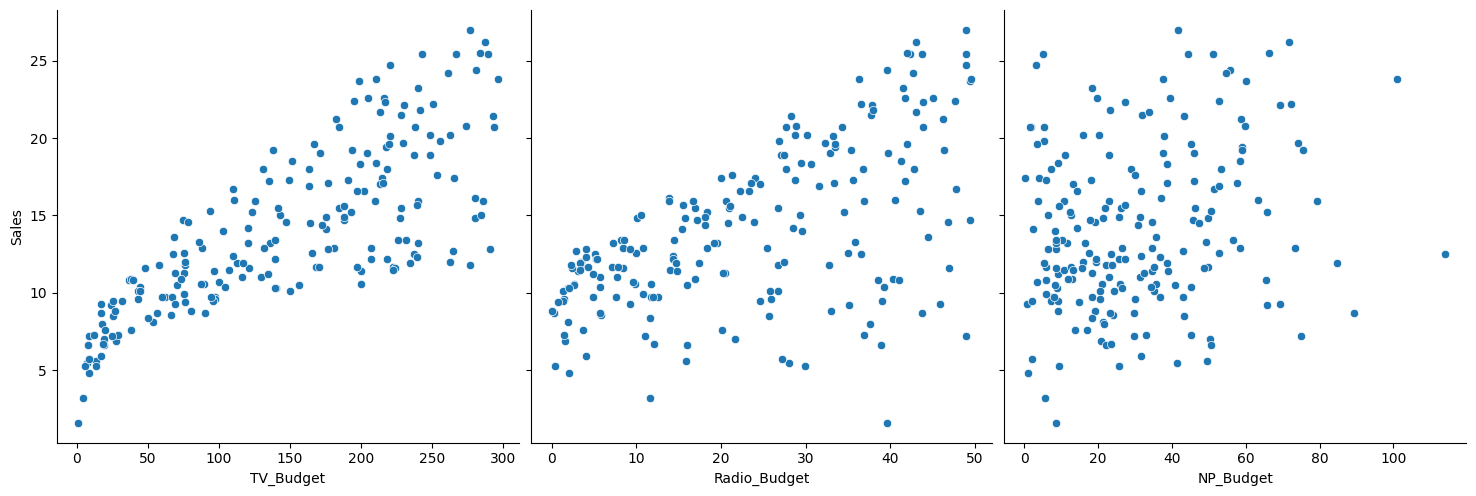

In [ ]:
sns.pairplot(df,
             x_vars=['TV_Budget','Radio_Budget','NP_Budget'],
             y_vars=['Sales'],
             height= 5)

<Axes: >

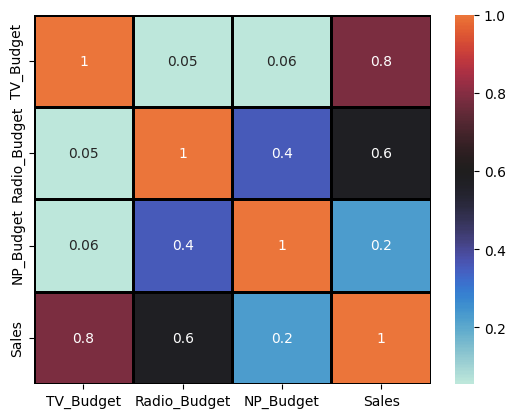

In [ ]:
sns.heatmap(data=df.corr(),
            annot = True,
            linewidths=2,
            linecolor='black',
            fmt='.1g',
            center=0.6)

In [ ]:
y = df.Sales
x=df.drop(columns=['Sales'])
x=sm.add_constant(x)
x.head()

,const,TV_Budget,Radio_Budget,NP_Budget
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


In [ ]:
print(y.shape)
print(x.shape)

(200,)
(200, 4)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        04:51:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9389      0.312      9.422   

In [ ]:
x_test.shape

(40, 4)

In [ ]:
# prediction = model.predict(x_test)
# prediction

In [ ]:
# new_input = [1]
# tv = int(input('enter the tv budget'))
# new_input.append(tv)
# radio = int(input('enter the radio budget'))
# new_input.append(radio)
# np = int(input('enter the newspaper budget'))
# new_input.append(np)

enter the tv budget100000
enter the radio budget20000
enter the newspaper budget40000


In [ ]:
# predictions = model.predict(new_input)
# predictions

array([8308.50405157])

In [ ]:
# x_test = [1, 100000, 20000, 40000]
# predictions = model.predict(x_test)
# predictions

array([8308.50405157])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE:", round(mean_absolute_error(y_test, prediction), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, prediction)), 0))

MAE: 1.0
RMSE: 2.0


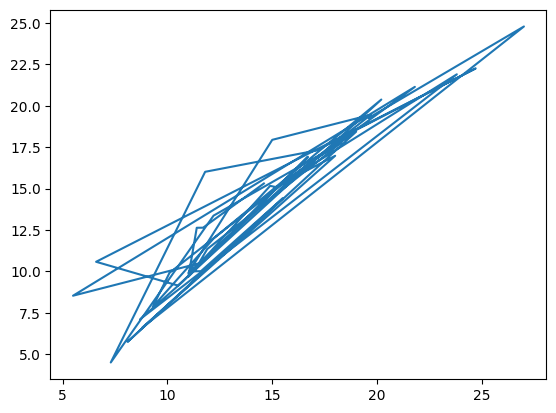

In [ ]:
plt.plot(y_test, predictions, scalex= True, scaley= True)

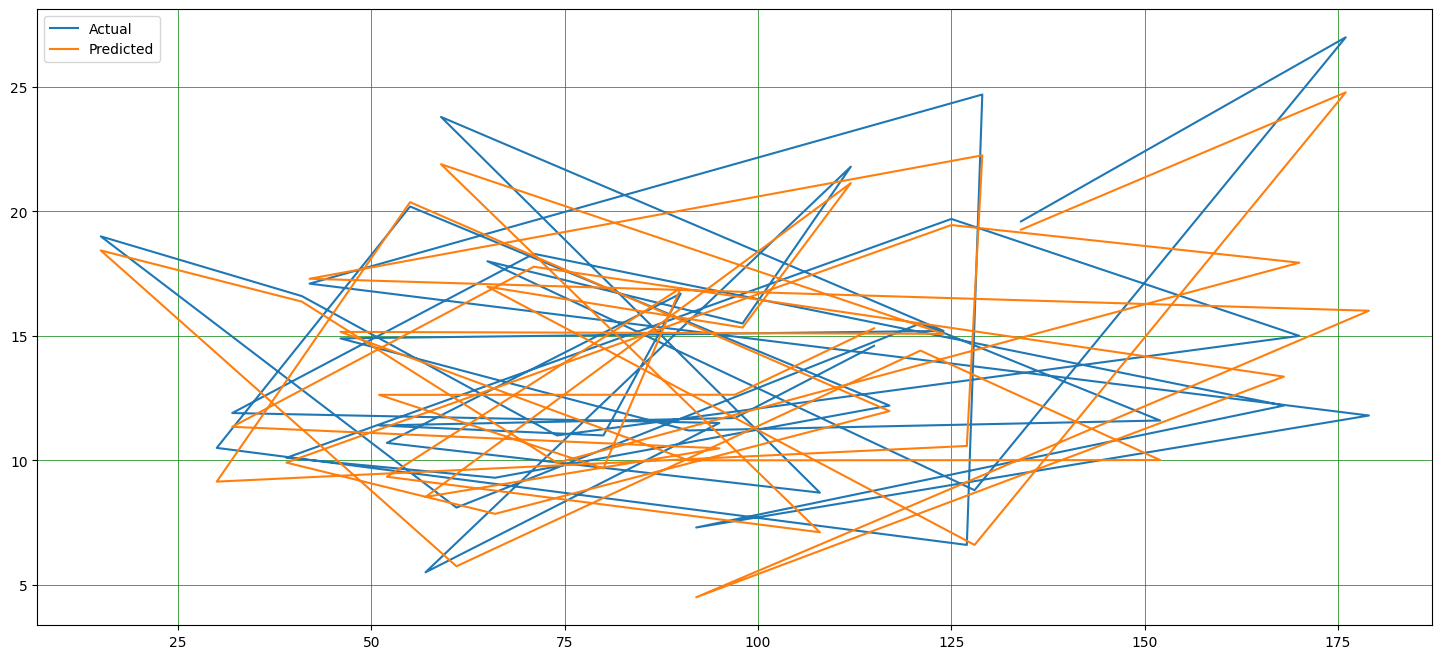

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
df.cumsum()

,Actual,Predicted
134,19.6,19.266923
176,46.6,44.053793
128,55.4,50.653462
65,73.4,67.631198
98,88.9,82.968276
112,110.7,104.108551
57,116.2,112.636263
95,127.7,123.118387
32,139.6,134.464480
71,157.9,152.243978


<Figure size 2000x3000 with 0 Axes>

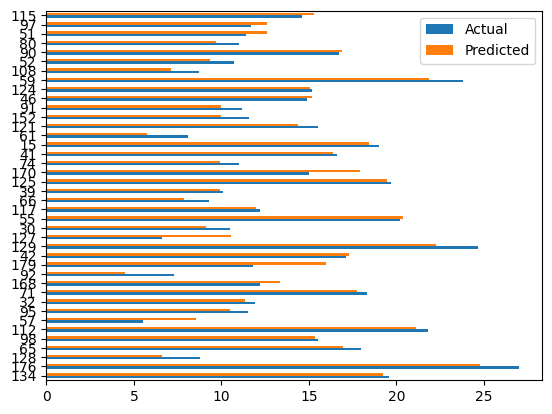

<Figure size 2000x3000 with 0 Axes>

In [ ]:
# df.plot.area; df.plot.barh; df.plot.density; df.plot.hist; df.plot.line; df.plot.scatter; df.plot.bar; df.plot.box; df.plot.hexbin; df.plot.kde; df.plot.pie
df.plot.barh()
plt.figure(figsize = (20,30))

<Axes: >

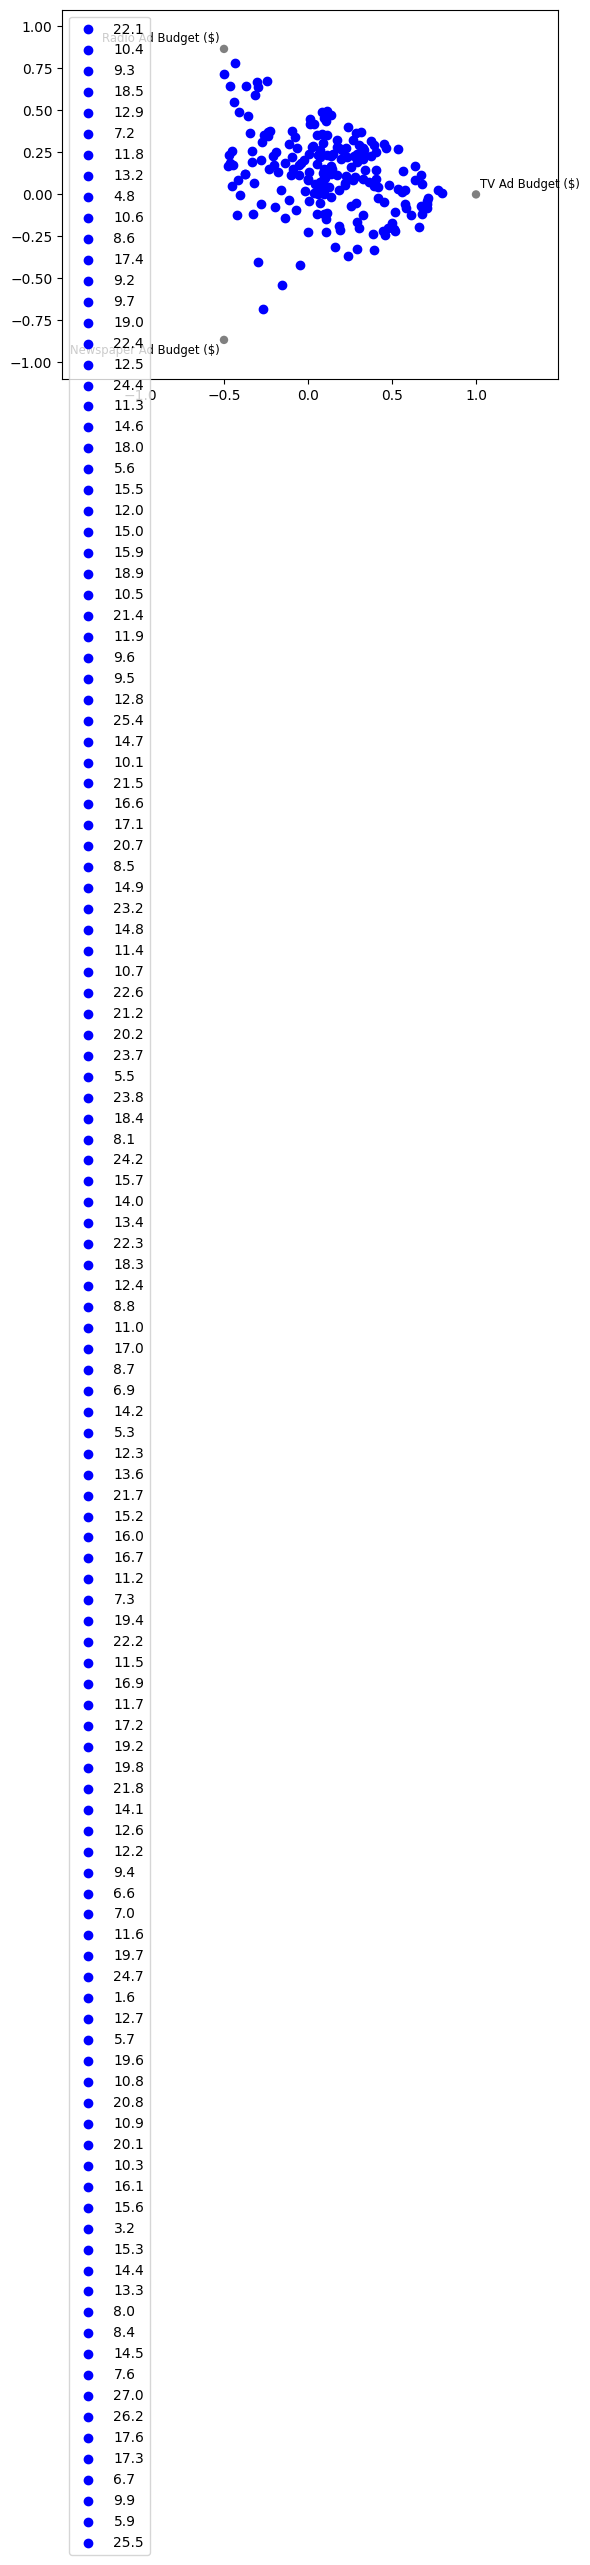

In [ ]:
data = pd.read_csv("Advertising Budget and Sales.csv")
data = data.drop(columns = "Unnamed: 0")
from pandas.plotting import radviz
radviz(frame = data, class_column = "Sales ($)", color = "blue")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

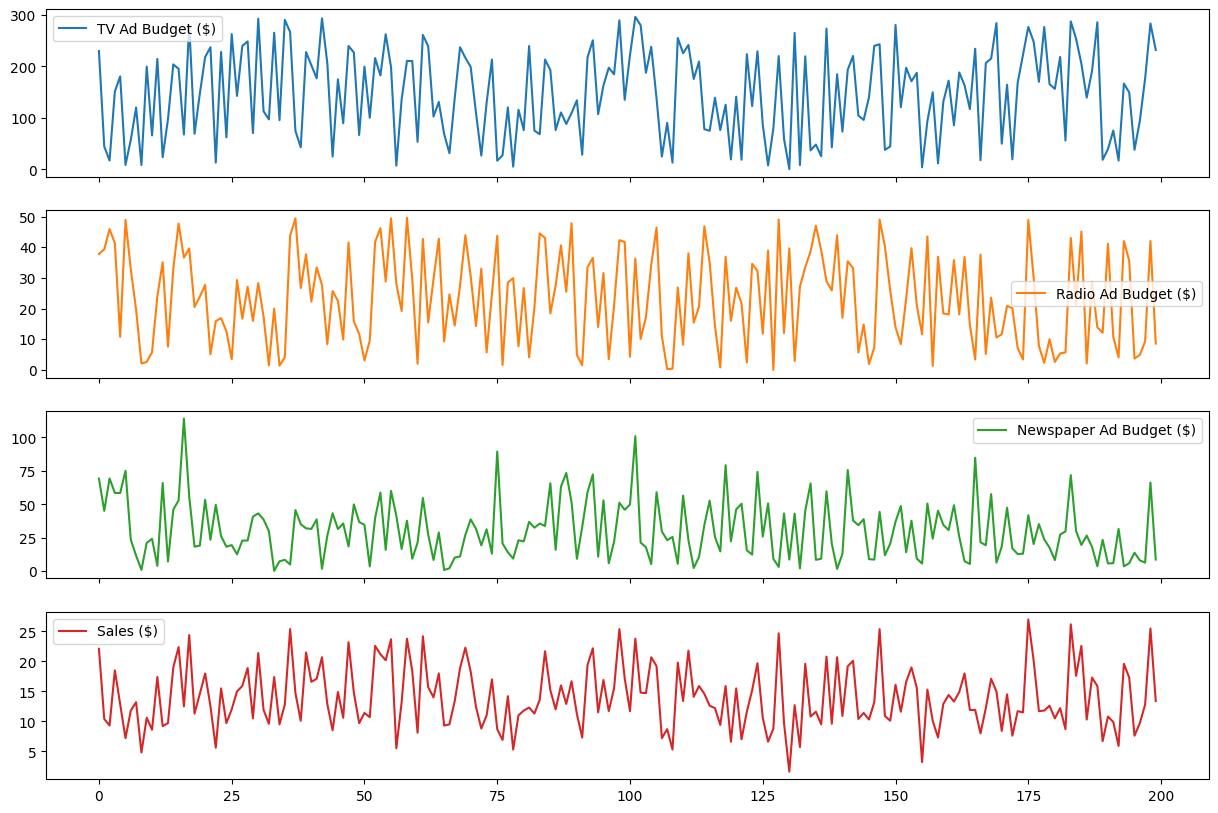

In [ ]:
data.plot(subplots = True, figsize=(15,10))

<Axes: >

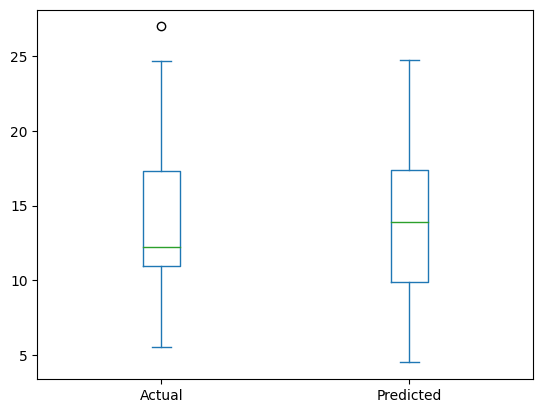

In [ ]:
df.plot.box()

<Axes: ylabel='Density'>

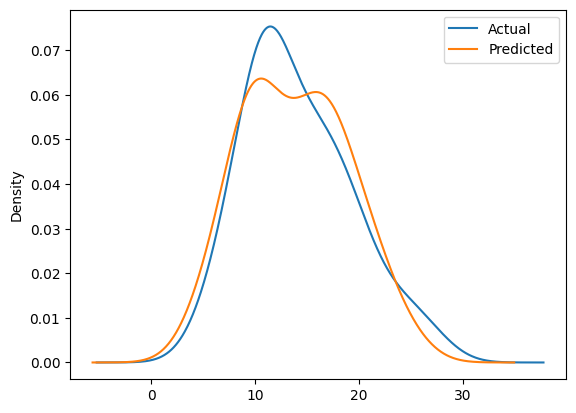

In [ ]:
df.plot.kde ()